<h1> Importing Data </h1>

In [54]:
import pandas as pd
import numpy as np
 
path = 'data.csv'
df = pd.read_csv(path)

In [55]:
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,0,1


In [56]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

<h1 id="ref1">Using Train/Test Split</h1>



In [57]:
y_data = df['price']
x_data=df.drop('price',axis=1)

x_data = x_data[['normalized-losses','stroke','compression-ratio','horsepower','peak-rpm','highway-mpg','diesel','gas']]

x_data['stroke'].fillna(x_data['stroke'].mean(), inplace = True)
print(x_data.isnull().sum())

normalized-losses    0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
highway-mpg          0
diesel               0
gas                  0
dtype: int64


In [58]:

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


<h1> Linear Regression on highway-mpg and price </h1>

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lre=LinearRegression()

In [61]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print(lre.score(x_test[['horsepower']], y_test))
y_hat_train = lre.predict(x_train[['horsepower']])
y_hat_test = lre.predict(x_test[['horsepower']])

0.7076883741478763


In [63]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437742229

<h2>Cross-validation Score</h2>

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
from sklearn.model_selection import cross_val_score

(0, 47538.794290356134)

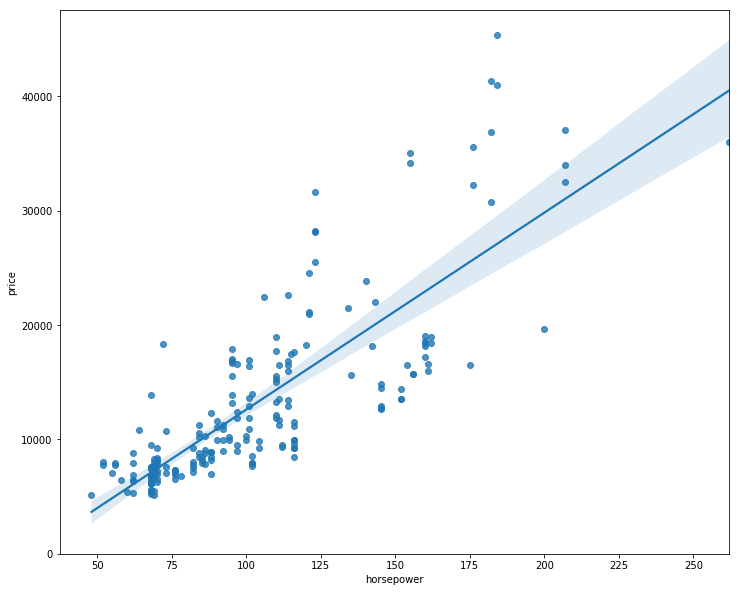

In [66]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

In [67]:
Rcross = cross_val_score(lre, x_train[['horsepower']], y_train, cv=4)

In [68]:
Rcross

array([0.52862981, 0.68132884, 0.73901475, 0.57046576])

In [69]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.6298597886760667 and the standard deviation is 0.08417100133043148


In [70]:
from sklearn.model_selection import cross_val_predict

In [71]:
cross_val_predict(lre,x_train[['horsepower']], y_train,cv=4)


array([10450.52558735, 12694.14404888,  7171.39091281, 23049.306179  ,
       22876.7201435 , 15282.93458141,  9415.00937434, 21496.03185949,
       16491.03682993,  6998.80487731, 11658.62783587, 19942.75753997,
        9760.18144534, 26673.61292455,  9760.18144534,  7343.97694832,
        6998.80487731, 10105.35351635, 22876.7201435 , 13256.11138003,
       23221.89221451,  6998.80487731, 11140.86972936, 12694.14404888,
        8379.49316133,  4237.42830928,  7343.97694832, 15282.93458141,
       14937.76251041, 12521.55801338, 22013.78996599,  7171.39091281,
        5963.2886643 ,  8724.66523233,  3547.08416727, 14247.4183684 ,
       10795.69765836, 21496.03185949,  6998.80487731, 16491.03682993,
       11658.62783587, 12694.14404888, 22186.37600149, 12078.64980756,
        7314.51166895, 15199.98169148, 12900.05293491, 16021.38481882,
       10600.12417834,  7478.79229442, 30149.51860918,  5343.14416332,
       30149.51860918, 19964.11983008,  7314.51166895, 14214.29793866,
      

<h1> Distribution Plots </h1> 


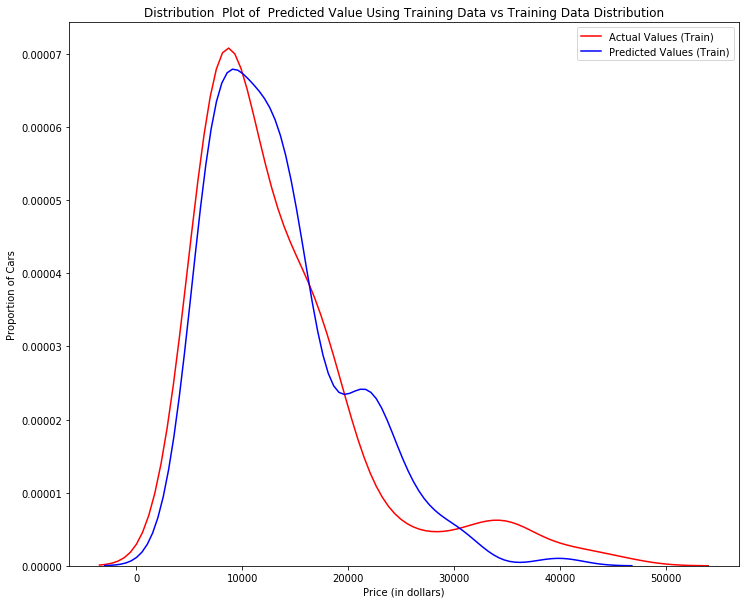

In [72]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

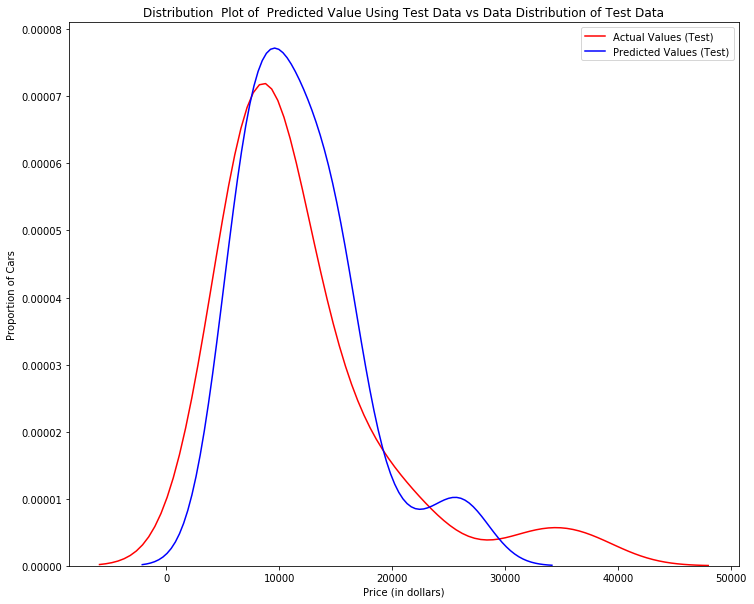

In [73]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_hat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<h1> Regression using Pipeline </h1>


In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

In [75]:
pr = PolynomialFeatures(degree=1)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr
x_train_pr.shape

(170, 9)

In [76]:
poly = LinearRegression()

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model' ,poly)]
pipe = Pipeline(Input)
pipe.fit(x_train_pr, y_train)
yhat = pipe.predict(x_test_pr)
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)
print("Training accuracy of is" ,pipe.score(x_train_pr, y_train))
print("Test accuracy of is" ,pipe.score(x_test_pr, y_test))

Predicted values: [6795.9808998  6319.32919446 9640.79536077 9828.24379756]
True values: [ 9549  6229 10245  7295]
Training accuracy of is 0.8774090424432814
Test accuracy of is 0.8459560500865244


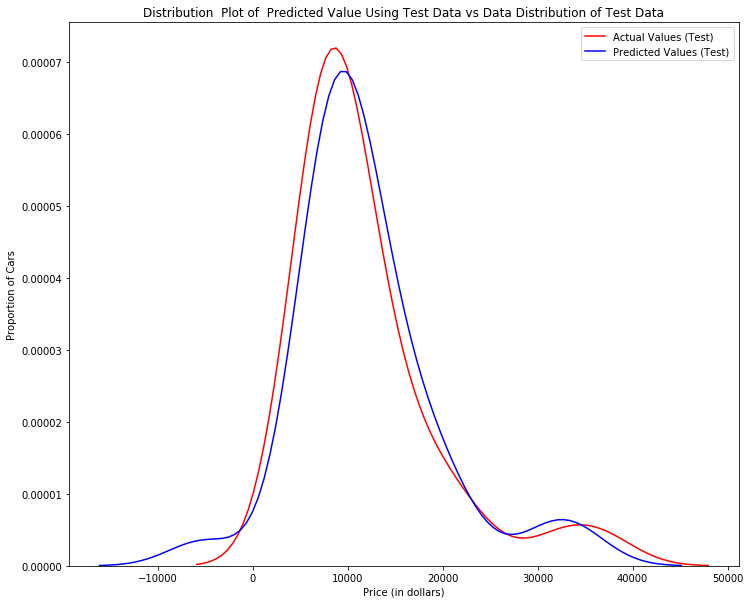

In [77]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

<h1> Ridge Regression using GridSearchCV </h1>

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]},{'normalize' : [True, False]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]},
 {'normalize': [True, False]}]

In [80]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [82]:
Grid1.fit(x_data, y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]},
                         {'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
BestRR.score(x_test, y_test)
y_hat_best = BestRR.predict(x_test)

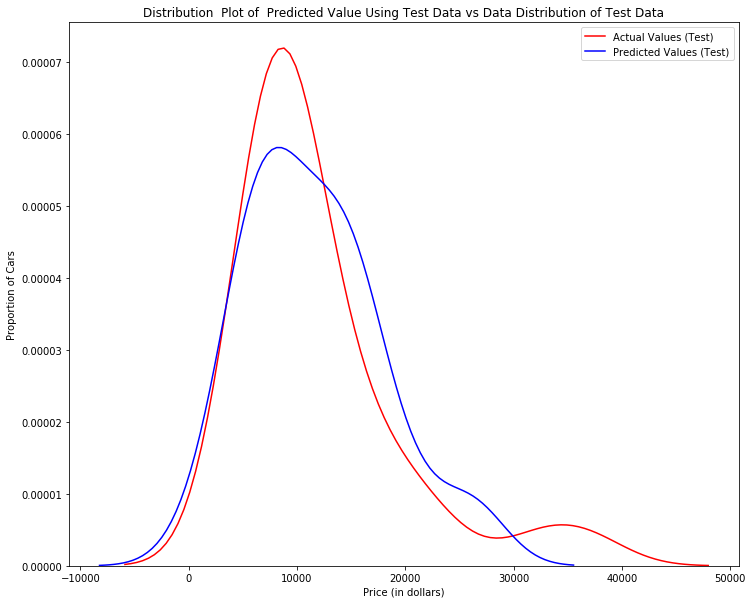

In [85]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_hat_best,"Actual Values (Test)","Predicted Values (Test)",Title)

<h1> Lasso Regression using RandomizedSearch CV </h1>

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
param_grid = {'alpha': sp_rand()}
model = Lasso(tol=0.1)
Lass = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10000)
Lass.fit(x_data, y_data)
BestLasso = Lass.best_estimator_

In [87]:
print(BestLasso)


Lasso(alpha=0.9999180576876211, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.1, warm_start=False)


In [88]:
y_hat_lasso = BestLasso.predict(x_test)

In [89]:
BestLasso.score(x_test,y_test)

0.7562011262494855

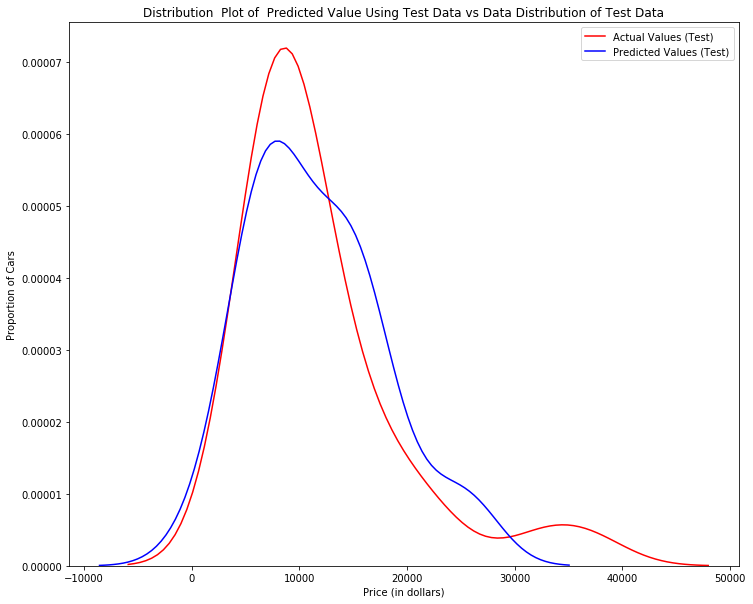

In [90]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_hat_lasso,"Actual Values (Test)","Predicted Values (Test)",Title)